In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load Dataset

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


# Define X & y

In [4]:
X = df.drop(columns=['Churn'])
y = df['Churn']

# Data Splitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

# Confusion Matrix

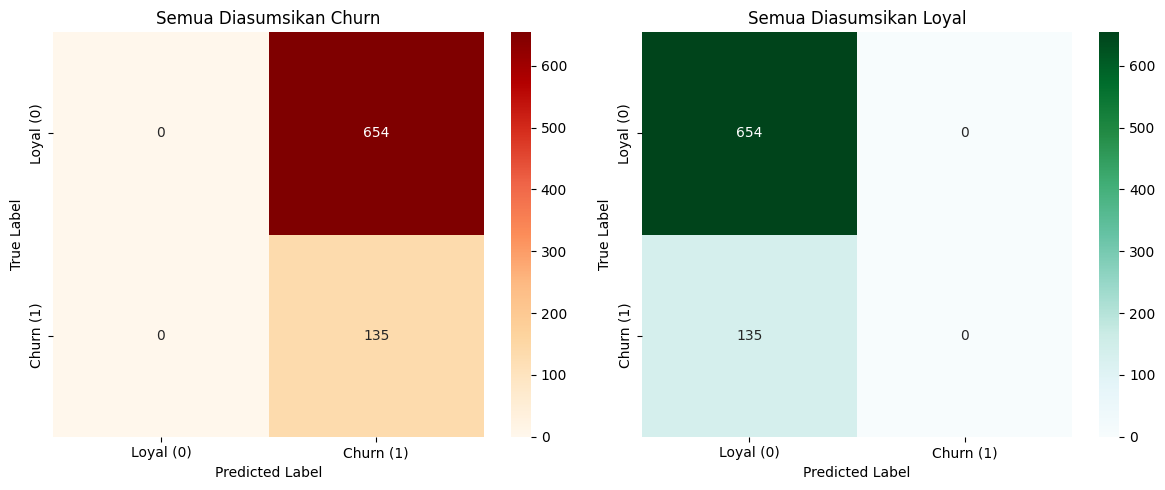

In [6]:
# Confusion matrix untuk dua skenario
all_churn_pred = np.ones_like(y_test)
all_loyal_pred = np.zeros_like(y_test)
cm_churn = confusion_matrix(y_test, all_churn_pred)
cm_loyal = confusion_matrix(y_test, all_loyal_pred)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Skenario 1: Semua diprediksi churn
sns.heatmap(cm_churn, annot=True, fmt='d', cmap='OrRd',
            xticklabels=['Loyal (0)', 'Churn (1)'],
            yticklabels=['Loyal (0)', 'Churn (1)'],
            ax=axes[0])
axes[0].set_title("Semua Diasumsikan Churn")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")


# Skenario 2: Semua diprediksi loyal
sns.heatmap(cm_loyal, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['Loyal (0)', 'Churn (1)'],
            yticklabels=['Loyal (0)', 'Churn (1)'],
            ax=axes[1])
axes[1].set_title("Semua Diasumsikan Loyal")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")


plt.tight_layout()
plt.show()